In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
class Tank():
    """ Estanque simple mezcla sin reacciones"""
    def __init__(self, area:float, alto:float, alto_max:float, densidad:float, concentraciones):
        self.area = area
        self.alto = alto
        self.alto_max = alto_max
        self.densidad = densidad
        self.concentraciones = concentraciones
        self.masas_liquido = concentraciones*alto*area
        self.volumen = area*alto
        self.flujo_salida = 0

    def flujo_in (self, flujo, densidad, concentraciones_in): # flujo de salida ingreso pero negativo
        self.alto = self.alto + flujo/self.area  # revisar formla
        #balance de masas_liquido
        self.masas_liquido +=  flujo*densidad*concentraciones_in
        self.volumen = self.volumen + flujo
        self.concentraciones = self.masas_liquido / self.volumen 

    def flujo_out (self): # flujo de salida se activa cuando esta lleno
        if self.alto_max <= self.alto:
            self.flujo_salida = (self.alto-self.alto_max)*self.area
            self.flujo_in(-self.flujo_salida,self.densidad, self.concentraciones)



In [63]:
class R_Tank(Tank):
    """ Reacion de Precipitacion de solucion a Solido
        Considero Especies acuosas y solidas como atomicas, es decir no hay formacion de moleculas
    """
    def __init__(self, area:float, alto:float, alto_max:float, densidad:float, concentraciones, constantes, saturacion, solidos):
        super().__init__( area, alto, alto_max, densidad, concentraciones)
        self.constantes = constantes.astype(np.float64)
        self.saturacion = saturacion.astype(np.float64)
        self.solidos = solidos
    
    def reaccion(self):
        for i in range(len(self.concentraciones)):
            variacion_masas_liquido_i = (self.concentraciones[i]-self.saturacion[i])*self.constantes[i]*self.volumen
            if variacion_masas_liquido_i>= 0: 
                self.masas_liquido[i] += - variacion_masas_liquido_i
                self.solidos[i] += variacion_masas_liquido_i
                
            else:
                if self.solidos[i] > 0:
                    self.masas_liquido[i] += -variacion_masas_liquido_i
                    self.solidos[i] += variacion_masas_liquido_i

        self.concentraciones = self.masas_liquido / self.volumen 

In [64]:
conc1=np.array([20., 30., 60.])
tk1 = Tank(20., 2., 20., 1., conc1)
tk1.alto

2.0

In [65]:
conc2 =np.array([1.,1.,1.])
tk1.flujo_in(1.,1., conc2)

In [66]:
evol_con0=[]
evol_flujo_salida=[]
x=[]
for i in range(0,1000):
    tk1.flujo_in(1,1 , conc2)
    tk1.flujo_out()
    evol_con0.append(tk1.concentraciones[0])
    evol_flujo_salida.append(tk1.flujo_salida)
    x.append(i)

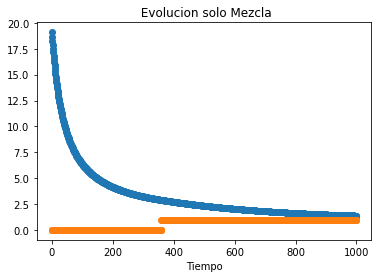

In [81]:
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x , evol_con0)
ax.scatter(x , evol_flujo_salida)
plt.title(" Evolucion solo Mezcla")
plt.xlabel("Tiempo")
# Guardar el gráfico en formato png
##plt.savefig('diagrama-dispersion.png')
# Mostrar el gráfico

plt.show()

Mejora de Simulacion para Visualizar reaciones

In [68]:

# (self, area, alto, alto_max, densidad, concentraciones, constantes, saturacion, solidos):

area = 20.
alto = 2.
alto_max = 20.
densidad = 1.
conc1=np.array([2., 2., 2.])
constantes_cineticas = np.array([0.1, 0.001, 0.001])
saturaciones = np.array([2., 4., 3.])
solidos = np.array([100., 60., 60.])


In [69]:
tkr2 = R_Tank(area, alto, alto_max, densidad, conc1, constantes_cineticas, saturaciones, solidos)
#conc_alimentacion =np.array([1,1,1])
conc_alimentacion =np.array([1.,6.,1.])

In [70]:
# simulacion

evol_con=[]
evol_solidos =[]
evol_flujo_salida=[]
x=[]

tiempo = 1000

for i in range(0,tiempo):
    tkr2.flujo_in(1.,1. , conc_alimentacion)
    tkr2.reaccion()
    tkr2.flujo_out()
    # Fin de calculo

    evol_con.append(tkr2.concentraciones)
    solidos_copia = tkr2.solidos.copy() # si no pongo copy, no funciona bien
    evol_solidos.append(solidos_copia)
    evol_flujo_salida.append(tkr2.flujo_salida)
    x.append(i)

Mejorar tamño de figura
https://www.delftstack.com/es/howto/matplotlib/how-to-improve-subplot-size-or-spacing-with-many-subplots-in-matplotlib/

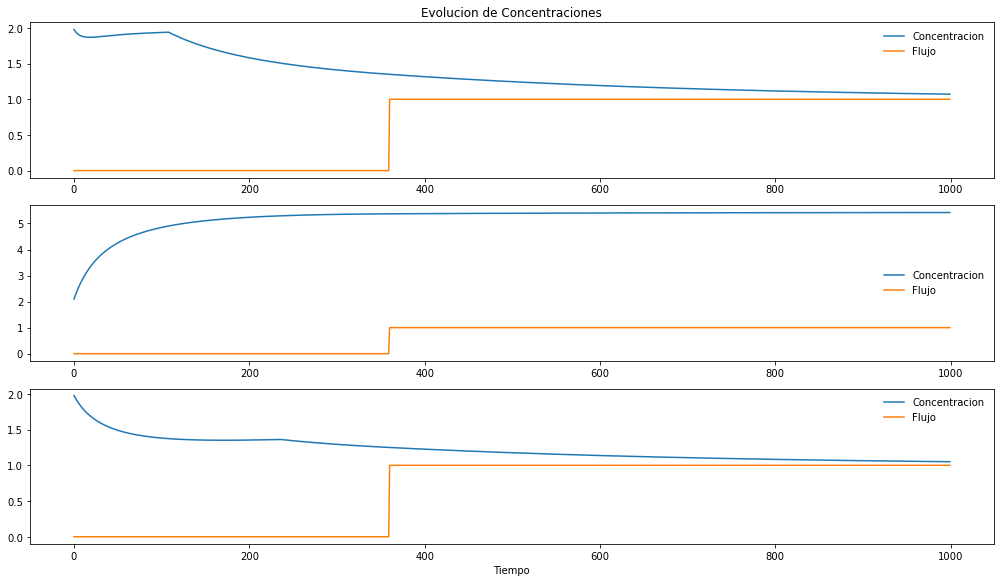

In [80]:
elementos = len(evol_con[0])

fig, ax = plt.subplots(elementos, 1, figsize=(14,8))
ax[0].set_title("Evolucion de Concentraciones")
for e in range(elementos):
    # Dibujar puntos
    evol_con_e = [c[e] for c in evol_con]
    #evol_solidos_e = [c[e] for c in evol_solidos]
    ax[e].plot(x , evol_con_e, label="Concentracion")
    ax[e].legend(loc='best', frameon=False)
    #ax[e].plot(x , evol_solidos_e)
    ax[e].plot(x , evol_flujo_salida, label="Flujo")
    ax[e].legend(loc='best', frameon=False)
    # Guardar el gráfico en formato png
    ##plt.savefig('diagrama-dispersion.png')

# Mostrar el gráfico

fig.tight_layout()
plt.xlabel("Tiempo")

plt.show()

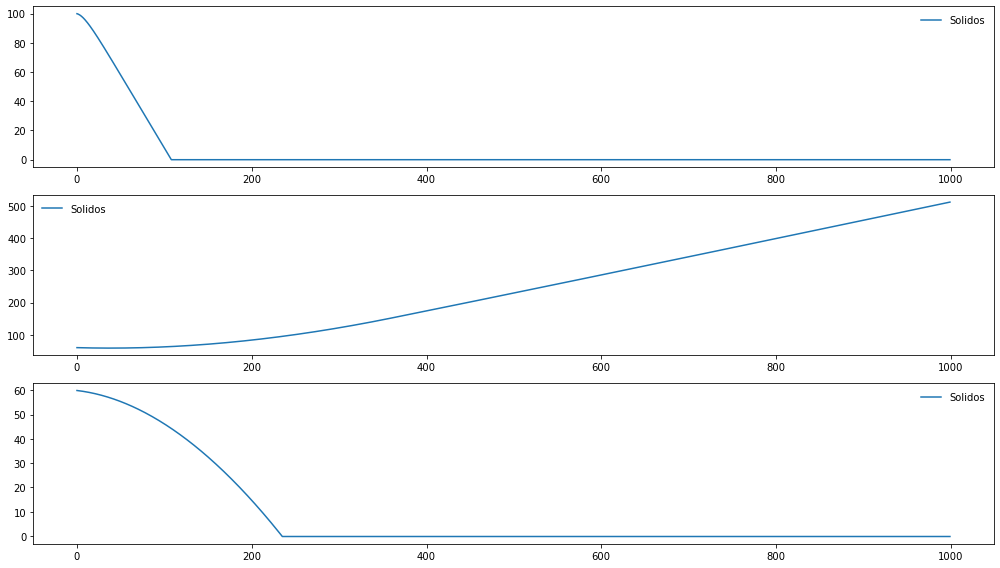

In [72]:
elementos = len(evol_con[0])
fig, ax = plt.subplots(elementos, 1, figsize=(14,8))

for e in range(elementos):
    # Dibujar puntos
    #evol_con_e = [c[e] for c in evol_con]
    evol_solidos_e = [c[e] for c in evol_solidos]
    #ax[e].plot(x , evol_con_e)
    ax[e].plot(x , evol_solidos_e, label="Solidos")
    ax[e].legend(loc='best', frameon=False)
    #ax[e].plot(x , evol_flujo_salida)

    # Guardar el gráfico en formato png
    ##plt.savefig('diagrama-dispersion.png')

# Mostrar el gráfico
fig.tight_layout()
plt.show()